In [3]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['Cars','Ice cream cone','Cricket ball']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/workspaces/codespaces-access-SandaruMA/NS_SVM_group/Image-Classification' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : Cars
loaded category:Cars successfully
loading... category : Ice cream cone
loaded category:Ice cream cone successfully
loading... category : Cricket ball
loaded category:Cricket ball successfully


In [4]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


In [6]:
model.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [7]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)

print("The predicted Data is :")
print(y_pred)

print("The actual data is:")
print(np.array(y_test))

print(f"The model is {accuracy_score(y_test, y_pred)*100:.2f}% accurate")

The predicted Data is :
[0 0 2 2 0 1 1 1 0 1 2 1 0 1 0 0 2 0 1 1]
The actual data is:
[0 0 2 2 0 1 1 2 0 1 2 2 0 1 2 0 0 0 1 1]
The model is 80.00% accurate


In [8]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[7 0 1]
 [0 6 0]
 [1 2 3]]


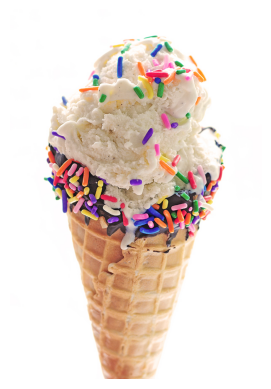

Cars = 7.39%
Ice cream cone = 72.01%
Cricket ball = 20.60%
The predicted image is : Ice cream cone


In [9]:
import requests
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

url = input("https://shewearsmanyhats.com/wp-content/uploads/2013/07/dipped-ice-cream-cones-7.jpg")

# Download image properly
response = requests.get(url, stream=True)
img = imread(response.raw)

plt.imshow(img)
plt.axis('off')
plt.show()

img_resize = resize(img, (150, 150, 3))
l = [img_resize.flatten()]

probability = model.predict_proba(l)

for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind] * 100:.2f}%')

print("The predicted image is : " + Categories[model.predict(l)[0]])

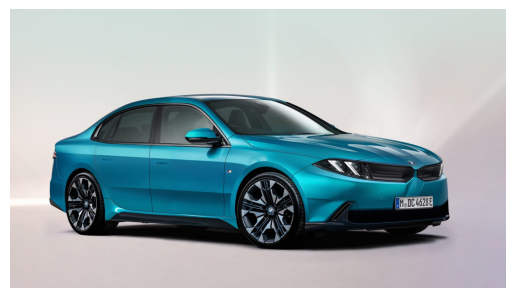

Cars = 98.63%
Ice cream cone = 0.91%
Cricket ball = 0.46%
The predicted image is : Cars


In [11]:
import requests
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

url = input("https://www.topgear.com/sites/default/files/2024/12/BMW-i3-Neue-Klasse-frontquarter_0.jpg?w=1654&h=930")

# Download image properly
response = requests.get(url, stream=True)
img = imread(response.raw)

plt.imshow(img)
plt.axis('off')
plt.show()

img_resize = resize(img, (150, 150, 3))
l = [img_resize.flatten()]

probability = model.predict_proba(l)

for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind] * 100:.2f}%')

print("The predicted image is : " + Categories[model.predict(l)[0]])

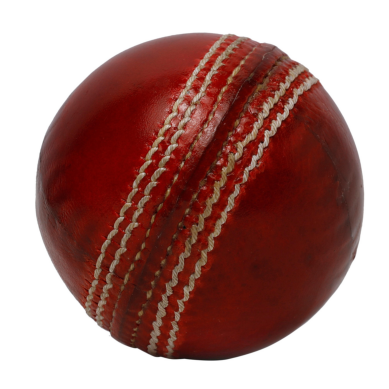

Cars = 2.97%
Ice cream cone = 1.65%
Cricket ball = 95.37%
The predicted image is : Cricket ball


In [12]:
import requests
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

url = input("https://contents.mediadecathlon.com/p1578931/1a2ac9f915249666f0869bb31df2038e/p1578931.jpg")

# Download image properly
response = requests.get(url, stream=True)
img = imread(response.raw)

plt.imshow(img)
plt.axis('off')
plt.show()

img_resize = resize(img, (150, 150, 3))
l = [img_resize.flatten()]

probability = model.predict_proba(l)

for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind] * 100:.2f}%')

print("The predicted image is : " + Categories[model.predict(l)[0]])